In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import minmax_scale

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
df = pd.read_csv("binary (1).txt",sep='\t',header=(0))

In [5]:
#displays first 5 collums of dataset for review
df.head()

,Unnamed: 0,admit,gre,gpa,rank
0,1,0,380,3.61,3
1,2,1,660,3.67,3
2,3,1,800,4.00,1
3,4,1,640,3.19,4
4,5,0,520,2.93,4


In [6]:
## Taking a look at the data
df.describe()

,Unnamed: 0,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.000000,400.00000
mean,200.500000,0.317500,587.700000,3.389900,2.48500
std,115.614301,0.466087,115.516536,0.380567,0.94446
min,1.000000,0.000000,220.000000,2.260000,1.00000
25%,100.750000,0.000000,520.000000,3.130000,2.00000
50%,200.500000,0.000000,580.000000,3.395000,2.00000
75%,300.250000,1.000000,660.000000,3.670000,3.00000
max,400.000000,1.000000,800.000000,4.000000,4.00000


# Problem Statement 1

In [7]:
dependent_variable = df['admit']
independent_variable = df[['gre', 'gpa']]

In [8]:
print(dependent_variable.head())

print(independent_variable.head())

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64
   gre   gpa
0  380  3.61
1  660  3.67
2  800  4.00
3  640  3.19
4  520  2.93


In [9]:
#calculate and display mean of gre and gpa
np.mean(independent_variable)

gre    587.7000
gpa      3.3899
dtype: float64

In [10]:
#calculate and display standard deviation of gre and gpa
np.std(independent_variable)

gre    115.372050
gpa      0.380091
dtype: float64

In [11]:
#normalize varibale using the minmax_scale function
norm_inde_var = minmax_scale(independent_variable)

In [12]:
df_inde_var = pd.DataFrame(norm_inde_var)

In [13]:
#display normalized variables of gre and gpa
df_inde_var.head()

,0,1
0,0.275862,0.775862
1,0.758621,0.810345
2,1.000000,1.000000
3,0.724138,0.534483
4,0.517241,0.385057


In [14]:
#display mean of gpa and gre
np.mean(df_inde_var)

0    0.633966
1    0.649368
dtype: float64

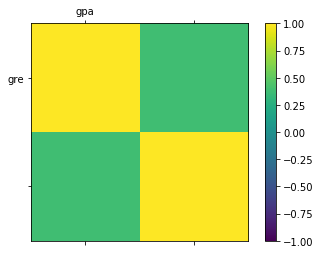

          0         1
0  1.000000  0.384266
1  0.384266  1.000000


In [15]:
name = ['gre', 'gpa']
names = ['gpa','gre']
core_inde_var = df_inde_var.corr()
fig = plt.figure()
ax =fig.add_subplot(111)
cax = ax.matshow(core_inde_var, vmin= -1, vmax = 1)
fig.colorbar(cax)
ticks =np.arange(0,9,1)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
ax.set_xticklabels(name)
ax.set_yticklabels(names)
plt.show()
print(core_inde_var)

In [16]:
 from sklearn.decomposition import PCA
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
#display the first 5 records for the covariant matrix
covariant_matrix = np.cov(norm_inde_var)
covariant_matrix[0:5]

array([[ 0.125     ,  0.01293103,  0.        , ..., -0.05028736,
        -0.00718391,  0.0704023 ],
       [ 0.01293103,  0.00133769,  0.        , ..., -0.00520214,
        -0.00074316,  0.007283  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04741379, -0.00490488,  0.        , ...,  0.01907451,
         0.00272493, -0.02670432],
       [-0.03304598, -0.00341855,  0.        , ...,  0.01329436,
         0.00189919, -0.0186121 ]])

In [18]:
#calculate and display eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)
print("eigen values: ", eigen_values[0:5])
print("eigen vectors: ", eigen_vectors[0:5])

eigen values:  [ 1.08256705e+01+0.00000000e+00j  5.07191485e-16+8.13224041e-16j
  5.07191485e-16-8.13224041e-16j -5.15868591e-16+0.00000000e+00j
 -8.48732925e-17+4.52632352e-16j]
eigen vectors:  [[ 0.10745524+0.j          0.11734163+0.02876832j  0.11734163-0.02876832j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.01111606+0.j         -0.03883705+0.03768768j -0.03883705-0.03768768j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.        +0.j         -0.        -0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [-0.04075888+0.j          0.03691164-0.01479768j  0.03691164+0.01479768j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [-0.02840771+0.j         -0.03920651-0.00258145j -0.03920651+0.00258145j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]]


##  The statistical interpretation of computed Eigen Vectors and Values

dvnnvjdnvjdn

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


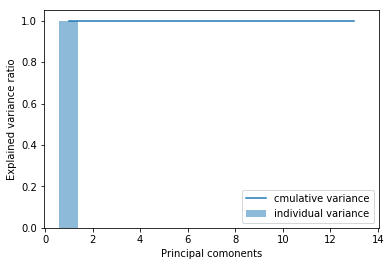

In [19]:
tot = sum(eigen_values[:1])
var_exp = [(i / tot) for i in sorted(eigen_values[:13], reverse=True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1,14), var_exp, alpha=0.5, align='center', label= 'individual variance')
step(range(1,14), cum_var_exp, where='mid', label='cmulative variance')
ylabel('Explained variance ratio')
xlabel('Principal comonents')
legend(loc='best')
show()

In [20]:
x = df_inde_var
pca =PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
#calculates and computes pca for singular values and explained variance ratio for pca
pca.explained_variance_ratio_
pca.singular_values_

array([4.93274158, 3.2530346 ])

In [22]:
#prints standard deviation and mean of explained variance ratio for pca
print(np.std(pca.explained_variance_ratio_))
print(np.mean(pca.explained_variance_ratio_))

0.19690721593046817
0.49999999999999994


In [23]:
#prints standard deviation and mean for pca singular values
print(np.std(pca.singular_values_))
print(np.mean(pca.singular_values_))

0.8398534935227375
4.092888089215796


# Problem state 2

In [24]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Discription of Logistical Model
x variable = gpa
y variable = gre

We are modeling the effect of the normalized GPA as a dependent variable of the normalized GRE. 
We used the logit model.

In [25]:
x = df_inde_var[0]
y = df_inde_var[1]
logit_model=sm.Logit(x,y)
result=logit_model.fit()
print(result.summary2())
print('1 is labeled as GPA')

Optimization terminated successfully.
         Current function value: 0.610819
         Iterations 4
                        Results: Logit
Model:              Logit            No. Iterations:   4.0000  
Dependent Variable: y                Pseudo R-squared: 0.028   
Date:               2019-05-13 22:51 AIC:              490.6552
No. Observations:   400              BIC:              494.6467
Df Model:           0                Log-Likelihood:   -244.33 
Df Residuals:       399              LL-Null:          -251.27 
Converged:          1.0000           Scale:            1.0000  
------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
1       0.9228      0.1558    5.9229    0.0000    0.6174    1.2281

1 is labeled as GPA


In [26]:
x = np.reshape(x,(-1,1))
y = np.reshape(y, (-1,1))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [27]:
print(y.shape)
print(x.shape)

(400, 1)
(400, 1)


In [28]:
from sklearn import preprocessing
from sklearn import utils

In [29]:
lab_enc = preprocessing.LabelEncoder()
y2 = lab_enc.fit_transform(y)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#losgistical regression model fitting
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.25, random_state=None)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.07


In [32]:
#evaluate models confusion matrix table of the two variablkes admit and admit_h
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 7]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         1
         11       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         1
         21       0.00      0.00      0.00         1
         22       0.00      0.00      0.00         1
         25       0.00      0.00      0.00         1
         26       0.00      0.00      0.00         3
         30       0.00      0.00      0.00         1
         32       0.00      0.00      0.00         1
         34       0.00      0.00      0.00         1
         35       0.00      0.00      0.00         1
         37       0.00      0.00      0.00         3
         38       0.00      0.00      0.00         1
         41       0.00      0.00      0.00         1
         43       0.00      0.00      0.00         2
         45       0.00      0.00      0.00   

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf

# For plotting/checking assumptions
import seaborn as sns

import statsmodels.api as sm

import statsmodels

In [37]:
# this calculates admmitance as a function of gre+gpa
admit_h = smf.logit(formula="admit~ gre + gpa", data= df).fit()
print(admit_h.summary2())

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations 5
                        Results: Logit
Model:              Logit            No. Iterations:   5.0000  
Dependent Variable: admit            Pseudo R-squared: 0.039   
Date:               2019-05-13 22:51 AIC:              486.3440
No. Observations:   400              BIC:              498.3184
Df Model:           2                Log-Likelihood:   -240.17 
Df Residuals:       397              LL-Null:          -249.99 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -4.9494    1.0751  -4.6037  0.0000  -7.0565  -2.8422
gre          0.0027    0.0011   2.5444  0.0109   0.0006   0.0048
gpa          0.7547    0.3196   2.3615  0.0182   0.1283   1.3811



In [38]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(admit_h.params), columns= ['OR'])
model_odds['z-value']= admit_h.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(admit_h.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.007088,0.000004,0.000862,0.058295
gre,1.002694,0.010946,1.000618,1.004775
gpa,2.126945,0.018203,1.136906,3.979130


# Problem statement 3

In [37]:
# this calculates admmitance as a function of the PCA with the largest Eigen value.
admit_h = smf.logit(formula="admit~ gre + gpa", data= df).fit()
print(admit_h.summary2())

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations 5
                        Results: Logit
Model:              Logit            No. Iterations:   5.0000  
Dependent Variable: admit            Pseudo R-squared: 0.039   
Date:               2019-05-13 22:51 AIC:              486.3440
No. Observations:   400              BIC:              498.3184
Df Model:           2                Log-Likelihood:   -240.17 
Df Residuals:       397              LL-Null:          -249.99 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -4.9494    1.0751  -4.6037  0.0000  -7.0565  -2.8422
gre          0.0027    0.0011   2.5444  0.0109   0.0006   0.0048
gpa          0.7547    0.3196   2.3615  0.0182   0.1283   1.3811



In [40]:
## Converting variable to categorical data type (since that what it is)
## and then creating dummy variables
df['rank'] = df['rank'].astype('category')

df = pd.get_dummies(df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


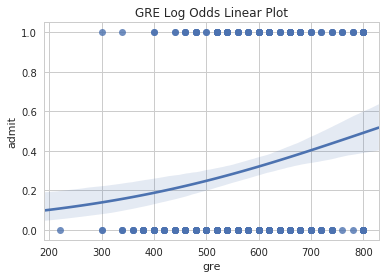

In [41]:
gre = sns.regplot(x= 'gre', y= 'admit', data= df, logistic= True).set_title("GRE Log Odds Linear Plot")
gre.figure.savefig("gre log lin.png")

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


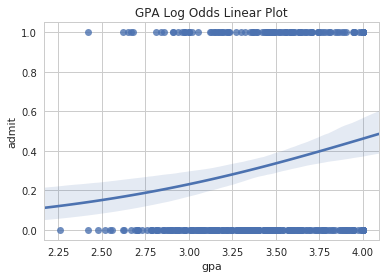

In [42]:
gpa = sns.regplot(x= 'gpa', y= 'admit', data= df, logistic= True).set_title("GPA Log Odds Linear Plot")
gpa.figure.savefig("gpa log lin.png")

In [44]:
#print correlation matrix
df.corr

<bound method DataFrame.corr of      Unnamed: 0  admit  gre   gpa  rank_1  rank_2  rank_3  rank_4
0             1      0  380  3.61       0       0       1       0
1             2      1  660  3.67       0       0       1       0
2             3      1  800  4.00       1       0       0       0
3             4      1  640  3.19       0       0       0       1
4             5      0  520  2.93       0       0       0       1
5             6      1  760  3.00       0       1       0       0
6             7      1  560  2.98       1       0       0       0
7             8      0  400  3.08       0       1       0       0
8             9      1  540  3.39       0       0       1       0
9            10      0  700  3.92       0       1       0       0
10           11      0  800  4.00       0       0       0       1
11           12      0  440  3.22       1       0       0       0
12           13      1  760  4.00       1       0       0       0
13           14      0  700  3.08       0   

In [46]:
type(df.index)

pandas.indexes.range.RangeIndex

In [50]:
#normalize varibale using the minmax_scale function
df_prob = minmax_scale(df)

df_prob2 = pd.DataFrame(df_prob)
df_prob2.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.0,0.275862,0.775862,0.0,0.0,1.0,0.0
1,0.002506,1.0,0.758621,0.810345,0.0,0.0,1.0,0.0
2,0.005013,1.0,1.000000,1.000000,1.0,0.0,0.0,0.0
3,0.007519,1.0,0.724138,0.534483,0.0,0.0,0.0,1.0
4,0.010025,0.0,0.517241,0.385057,0.0,0.0,0.0,1.0


In [63]:
high_eigen_vec = eigen_vectors.argsort()[::-1]   

print(high_eigen_vec)


[[373 375 374 ... 372 380 381]
 [234 293 294 ... 274 275 276]
 [159 158 138 ... 174 164 189]
 ...
 [  0 271 270 ... 136 399 395]
 [  9  10   2 ...  12  13   6]
 [ 10   9  38 ...   0   2   1]]


In [69]:
gre_high_eigen_vec = high_eigen_vec[0]
print(gre_high_eigen_vec)

[373 375 374   4   5  27  28  25  26 392 344 343  48  47 389 390 357 356
  52  51  34  33  74  75 335  20  21  36  35  11   9  10  38 315 107 106
 332 331 336 337 326 325 151  84  83 147 148 196 108 109 310 349 348 371
 103 104  67  66  43  44 378 379 161 160 145 146 330 329 182 181 309 308
 360 359 322 321   3 183 184 278 277  73  72 189 121 120 251 306 307 319
 320 206 316  64  63 170 171 173 172  61  62  15  14 273 272 202 203 163
 162 237 238 164 227 111 110 214 215 258 259 167 168   6 156 157 262 263
 200 199  96  95 260 261 225 256 257 155 154 295 296 226 101 102 317 318
 140 139 230 231 292 291 198 197 209 393 125 124 201 246 245 253 252 358
 233 232 239 169 250 249 398 395 396 397 399 267 266 244 283 152 153  40
  39 364 365 224 223 234 285 286 195 194 305 304 314 313  85  86 362 363
 180 179 135 136 241 240  55  56 205 204 300 301  79  80 235 236  76 255
 254 281 282 247 248 126 127 159 158 340 391 270 271 207 208 166 165 385
 384 276 275 346 284 143 144 265 264 228 229 345 21

In [71]:
gpa_high_eigen_vec = high_eigen_vec[1]
print(gpa_high_eigen_vec)

[234 293 294 315 296 295 196 208 207 345 255 254 282 281 292 291 332 331
 201 152 153 231 230 299 333 334 183 184 174 287 288 251 263 262 309 308
 357 356 164 222 318 317 189 284 112 113 157 156 238 237 162 163 348 349
 199 200 358 178 177 360 359 136 135 272 273 227 279 280 115 114 310 313
 314 371 235 236 209 373 290 289 372 117 116 350 351 110 111  83  84   4
   5  89  90  43  44  79  80  94  93 144 143 131 132  41  42 149 150 362
 363  99 100  76 182 181 129 128 380 381 376 377  34  33  50  49   0  92
  91 192 193 225 340  24 364 365 214 215  53  54  55  56 148 147   3 352
 353 106 107  16  17 374 375 265 264   6 221 220  88  87  27  28  48  47
  30  29 130  65 391 382 383   8   7 390 389 127 126 394 185 186  67  66
   9  10  19  18 172 173 399 398 397 396 395 388 385 384  11 393 392 301
 300 240 241 101 102 387 386  32  31 305 304  62  61  21  20  14  15 154
 155  35  36  12  13 320 319 347  75  74  77  78 125 124  72  73  70  71
 104 103  51  52  40  39  69  68  59  60 329 330  8

In [73]:
gg_eigen_vec = gre_high_eigen_vec * gpa_high_eigen_vec
print(gg_eigen_vec)

[ 87282 109875 109956   1260   1480   7965   5488   5200   5382 135240
  87720  87122  13536  13207 113588 113490 118524 117836  10452   7752
   5202   7623  17020  22425 111555   6680   3843   6624   6090   3157
   2592   2510   9994  82530  33063  32648 118524 117836  55104  74814
 103668 103025  28539  23856   9296  16611  23236  30576  25704  25833
  50220  56887 121104 129479  20497  20800  23986  11748   7611  15840
 135702  51544  21735  43520  39585  33142  92070  92120  20930  20634
  95790  96404 113040 133189  75670  75756    627  68259  53360  80342
 103044   8541   8352  66150  42471  13200  27861  25398  25788   1276
   1600  18334  28440   2752   2772  13430  13680  16262  15996   8784
   8866   1965   1848  11193  11424  30098  30450  59006  58806  23463
  23800  12464  41314  20091  14190  27392  81700  98298  97384  62959
   5712    198   7800   7693      0  24196  18200  38208  18528  21375
  88400   6264  81900  93440  54998  33325   8162  15930  16280  12656
  1494

In [75]:
np.sum(gre_high_eigen_vec)

79800

In [76]:
np.sum(gpa_high_eigen_vec)

79800